In [1]:
import pandas as pd
import gc #garbage collector

import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np

from stargazer.stargazer import Stargazer #visualizar diferentes modelos

pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
pd.set_option('display.max_rows', 20)  # ao invés de none pode por INT do limite
#pd.set_option('display.max_colwidth', None)

df = pd.read_csv('../data/df_dados_integrados.csv', low_memory=False)
#df = pd.read_csv('../data/df_dados_integrados_1onda.csv', low_memory=False)

In [2]:
#brasilia tudo nan
#df = df.loc[df['CityName'] != 'Brasilia']

#retirar março, começar em abril ()
df = df.loc[(df['FormattedDate'] >= '2020-04-01')]

df = df.sort_values(by='FormattedDate')

df

,CityName,RegionCode,FormattedDate,RegionName,CityCode,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedDeaths,StringencyIndex,NewDeaths,idhm,idhmr,idhml,idhme,ConfirmedCases,NewCases,TotalHabitantes,Morte ponderada por 100 mil,MortePonderadaP100kMA,NewDeathsLag+35,ConfirmedDeathsLag+35,MortePonderadaP100kLag+35,MortePonderadaP100kMALag+35,NewDeathsLag+37,ConfirmedDeathsLag+37,MortePonderadaP100kLag+37,MortePonderadaP100kMALag+37,NewDeathsLag+5,ConfirmedDeathsLag+5,MortePonderadaP100kLag+5,MortePonderadaP100kMALag+5,NewDeathsLag+40,ConfirmedDeathsLag+40,MortePonderadaP100kLag+40,MortePonderadaP100kMALag+40,NewDeathsLag+10,ConfirmedDeathsLag+10,MortePonderadaP100kLag+10,MortePonderadaP100kMALag+10,NewDeathsLag+45,ConfirmedDeathsLag+45,MortePonderadaP100kLag+45,MortePonderadaP100kMALag+45,NewDeathsLag+15,ConfirmedDeathsLag+15,MortePonderadaP100kLag+15,MortePonderadaP100kMALag+15,NewDeathsLag+50,ConfirmedDeathsLag+50,MortePonderadaP100kLag+50,MortePonderadaP100kMALag+50,NewDeathsLag+20,ConfirmedDeathsLag+20,MortePonderadaP100kLag+20,MortePonderadaP100kMALag+20,NewDeathsLag+55,ConfirmedDeathsLag+55,MortePonderadaP100kLag+55,MortePonderadaP100kMALag+55,NewDeathsLag+120,ConfirmedDeathsLag+120,MortePonderadaP100kLag+120,MortePonderadaP100kMALag+120,NewDeathsLag+25,ConfirmedDeathsLag+25,MortePonderadaP100kLag+25,MortePonderadaP100kMALag+25,NewDeathsLag+90,ConfirmedDeathsLag+90,MortePonderadaP100kLag+90,MortePonderadaP100kMALag+90,NewDeathsLag+60,ConfirmedDeathsLag+60,MortePonderadaP100kLag+60,MortePonderadaP100kMALag+60,NewDeathsLag+30,ConfirmedDeathsLag+30,MortePonderadaP100kLag+30,MortePonderadaP100kMALag+30,NewCasesPonderado
30,Cruzeiro do Sul,BR_AC,2020-04-01,Acre,BR_1200203,20200401,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,NaN,83.33,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.080193,NaN,NaN,0.000000,0.000000e+00,0.0,0.0,0.000000,0.080193,NaN,NaN,0.000000,0.000000,0.0,1.0,0.000000,0.080193,0.0,0.0,0.000000,0.000000,NaN,3.0,0.000000,0.160385,0.0,0.0,0.000000,0.000000,1.0,4.0,1.122698,0.641542,1.0,52.0,1.122698,0.561349,0.0,0.0,0.000000,0.000000,0.0,35.0,0.000000,0.721735,2.0,9.0,2.245397,0.641542,0.0,0.0,0.000000,0.000000,NaN
1014,Manaus,BR_AM,2020-04-01,Amazonas,BR_1302603,20200401,3.0,2.0,2.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,72.22,0.0,0.737,0.738,0.826,0.658,179.0,20.0,2219580,0.000000,6.114474e-02,73.0,532.0,3.288943,1.454601,41.0,604.0,1.847215,1.599418,4.0,15.0,0.180216,1.641254e-01,11.0,691.0,0.495594,1.779634,3.0,45.0,0.135162,0.392614,32.0,920.0,1.441729,1.683089,15.0,107.0,0.675810,0.473067,37.0,1094.0,1.666999,1.657344,7.0,163.0,0.315378,0.630756,58.0,1248.0,2.613133,1.351621,2.0,2003.0,0.090108,0.199525,13.0,246.0,0.585702,0.753046,19.0,1790.0,0.856026,0.411922,0.0,1366.0,0.000000,0.920389,45.0,357.0,2.027431,1.190713,0.901071
6426,Belem,BR_PA,2020-04-01,Para,BR_1501402,20200401,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,0.0,83.33,0.0,0.746,0.751,0.822,0.673,25.0,4.0,1499641,0.000000,1.428928e-02,16.0,216.0,1.066933,1.986210,30.0,297.0,2.000499,2.143392,3.0,3.0,0.200050,5.239402e-02,80.0,427.0,5.334663,2.286284,1.0,8.0,0.066683,0.104788,29.0,652.0,1.933815,2.395835,4.0,20.0,0.266733,0.104788,53.0,965.0,3.534215,2.105287,1.0,24.0,0.066683,0.266733,19.0,1174.0,1.266983,2.014788,4.0,2026.0,0.266733,0.009526,8.0,67.0,0.533466,0.743042,8.0,1905.0,0.533466,0.466783,0.0,1320.0,0.000000,2.586359,17.0,156.0,1.133616,1.114564,0.266731
11100,Porto Alegre,BR_RS,2020-04-01,Rio Grande do Sul,BR_4314902,20200401,3.0,3.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,3.0,90.74,1.0,0.805,0.867,0.857,0.702,190.0,0.0,1488252,0.067194,2.399771e-02,0.0,17.0,0.000000,0.023998,0.0,17.0,0.000000,0.028797,0.0,5.0,0.000000,1.919817e-02,1.0,18.0,0.067194,0.023998,0.0,6.0,0.000000,0.023998,0.0,21.0,0.000000,0

In [3]:
#MortePonderadaP100kMALag+45
df.loc[(df['MortePonderadaP100kMALag+45'] <= 0), 'MortePonderadaP100kMALag+45'] = 0.0000001

df['MortePonderadaP100kMALag+45Log'] = np.log(df['MortePonderadaP100kMALag+45'])

In [4]:
df

,CityName,RegionCode,FormattedDate,RegionName,CityCode,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedDeaths,StringencyIndex,NewDeaths,idhm,idhmr,idhml,idhme,ConfirmedCases,NewCases,TotalHabitantes,Morte ponderada por 100 mil,MortePonderadaP100kMA,NewDeathsLag+35,ConfirmedDeathsLag+35,MortePonderadaP100kLag+35,MortePonderadaP100kMALag+35,NewDeathsLag+37,ConfirmedDeathsLag+37,MortePonderadaP100kLag+37,MortePonderadaP100kMALag+37,NewDeathsLag+5,ConfirmedDeathsLag+5,MortePonderadaP100kLag+5,MortePonderadaP100kMALag+5,NewDeathsLag+40,ConfirmedDeathsLag+40,MortePonderadaP100kLag+40,MortePonderadaP100kMALag+40,NewDeathsLag+10,ConfirmedDeathsLag+10,MortePonderadaP100kLag+10,MortePonderadaP100kMALag+10,NewDeathsLag+45,ConfirmedDeathsLag+45,MortePonderadaP100kLag+45,MortePonderadaP100kMALag+45,NewDeathsLag+15,ConfirmedDeathsLag+15,MortePonderadaP100kLag+15,MortePonderadaP100kMALag+15,NewDeathsLag+50,ConfirmedDeathsLag+50,MortePonderadaP100kLag+50,MortePonderadaP100kMALag+50,NewDeathsLag+20,ConfirmedDeathsLag+20,MortePonderadaP100kLag+20,MortePonderadaP100kMALag+20,NewDeathsLag+55,ConfirmedDeathsLag+55,MortePonderadaP100kLag+55,MortePonderadaP100kMALag+55,NewDeathsLag+120,ConfirmedDeathsLag+120,MortePonderadaP100kLag+120,MortePonderadaP100kMALag+120,NewDeathsLag+25,ConfirmedDeathsLag+25,MortePonderadaP100kLag+25,MortePonderadaP100kMALag+25,NewDeathsLag+90,ConfirmedDeathsLag+90,MortePonderadaP100kLag+90,MortePonderadaP100kMALag+90,NewDeathsLag+60,ConfirmedDeathsLag+60,MortePonderadaP100kLag+60,MortePonderadaP100kMALag+60,NewDeathsLag+30,ConfirmedDeathsLag+30,MortePonderadaP100kLag+30,MortePonderadaP100kMALag+30,NewCasesPonderado,MortePonderadaP100kMALag+45Log
30,Cruzeiro do Sul,BR_AC,2020-04-01,Acre,BR_1200203,20200401,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,NaN,83.33,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.080193,NaN,NaN,0.000000,0.000000e+00,0.0,0.0,0.000000,0.080193,NaN,NaN,0.000000,0.000000,0.0,1.0,0.000000,0.080193,0.0,0.0,0.000000,0.000000,NaN,3.0,0.000000,0.160385,0.0,0.0,0.000000,0.000000,1.0,4.0,1.122698,0.641542,1.0,52.0,1.122698,0.561349,0.0,0.0,0.000000,0.000000,0.0,35.0,0.000000,0.721735,2.0,9.0,2.245397,0.641542,0.0,0.0,0.000000,0.000000,NaN,-2.523322
1014,Manaus,BR_AM,2020-04-01,Amazonas,BR_1302603,20200401,3.0,2.0,2.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,72.22,0.0,0.737,0.738,0.826,0.658,179.0,20.0,2219580,0.000000,6.114474e-02,73.0,532.0,3.288943,1.454601,41.0,604.0,1.847215,1.599418,4.0,15.0,0.180216,1.641254e-01,11.0,691.0,0.495594,1.779634,3.0,45.0,0.135162,0.392614,32.0,920.0,1.441729,1.683089,15.0,107.0,0.675810,0.473067,37.0,1094.0,1.666999,1.657344,7.0,163.0,0.315378,0.630756,58.0,1248.0,2.613133,1.351621,2.0,2003.0,0.090108,0.199525,13.0,246.0,0.585702,0.753046,19.0,1790.0,0.856026,0.411922,0.0,1366.0,0.000000,0.920389,45.0,357.0,2.027431,1.190713,0.901071,0.520631
6426,Belem,BR_PA,2020-04-01,Para,BR_1501402,20200401,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,0.0,83.33,0.0,0.746,0.751,0.822,0.673,25.0,4.0,1499641,0.000000,1.428928e-02,16.0,216.0,1.066933,1.986210,30.0,297.0,2.000499,2.143392,3.0,3.0,0.200050,5.239402e-02,80.0,427.0,5.334663,2.286284,1.0,8.0,0.066683,0.104788,29.0,652.0,1.933815,2.395835,4.0,20.0,0.266733,0.104788,53.0,965.0,3.534215,2.105287,1.0,24.0,0.066683,0.266733,19.0,1174.0,1.266983,2.014788,4.0,2026.0,0.266733,0.009526,8.0,67.0,0.533466,0.743042,8.0,1905.0,0.533466,0.466783,0.0,1320.0,0.000000,2.586359,17.0,156.0,1.133616,1.114564,0.266731,0.873732
11100,Porto Alegre,BR_RS,2020-04-01,Rio Grande do Sul,BR_4314902,20200401,3.0,3.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,3.0,90.74,1.0,0.805,0.867,0.857,0.702,190.0,0.0,1488252,0.067194,2.399771e-02,0.0,17.0,0.000000,0.023998,0.0,17.0,0.000000,0.028797,0.0,5.0,0.000000,1.919817e-02,1.0,18.0,0.06

In [5]:
df.columns

Index(['CityName', 'RegionCode', 'FormattedDate', 'RegionName', 'CityCode',
       'Date', 'C1_School closing', 'C2_Workplace closing',
       'C3_Cancel public events', 'C4_Restrictions on gatherings',
       'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement',
       'C8_International travel controls', 'H1_Public information campaigns',
       'ConfirmedDeaths', 'StringencyIndex', 'NewDeaths', 'idhm', 'idhmr',
       'idhml', 'idhme', 'ConfirmedCases', 'NewCases', 'TotalHabitantes',
       'Morte ponderada por 100 mil', 'MortePonderadaP100kMA',
       'NewDeathsLag+35', 'ConfirmedDeathsLag+35', 'MortePonderadaP100kLag+35',
       'MortePonderadaP100kMALag+35', 'NewDeathsLag+37',
       'ConfirmedDeathsLag+37', 'MortePonderadaP100kLag+37',
       'MortePonderadaP100kMALag+37', 'NewDeathsLag+5', 'ConfirmedDeathsLag+5',
       'MortePonderadaP100kLag+5', 'MortePonderadaP100kMALag+5',
       'NewDeathsLag+40', 'ConfirmedDeathsLag+40'

### Analisar correlação dos indicadores e remover os muitos correlacionados pra dimiuir o problema da multicolinearidade

In [6]:
df_ind = df.iloc[:, 6:15]
df_ind.corr()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns
C1_School closing,1.000000,0.192476,0.135852,0.303955,0.182976,0.013605,0.371666,0.326647,NaN
C2_Workplace closing,0.192476,1.000000,0.202100,0.248591,0.081899,-0.093080,0.209216,0.363359,NaN
C3_Cancel public events,0.135852,0.202100,1.000000,0.364391,-0.066144,0.091063,0.180540,0.248685,NaN
C4_Restrictions on gatherings,0.303955,0.248591,0.364391,1.000000,0.038837,-0.014129,0.258631,0.294629,NaN
C5_Close public transport,0.182976,0.081899,-0.066144,0.038837,1.000000,-0.040453,0.237078,0.109765,NaN
C6_Stay at home requirements,0.013605,-0.093080,0.091063,-0.014129,-0.040453,1.000000,0.032774,0.109906,NaN
C7_Restrictions on internal movement,0.371666,0.209216,0.180540,0.258631,0.237078,0.032774,1.000000,0.353152,NaN
C8_International travel controls,0.326647,0.363359,0.248685,0.294629,0.109765,0.109906,0.353152,1.000000,NaN
H1_Public information campaigns,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_11133/56519100.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_ind.corr(), dtype=np.bool))


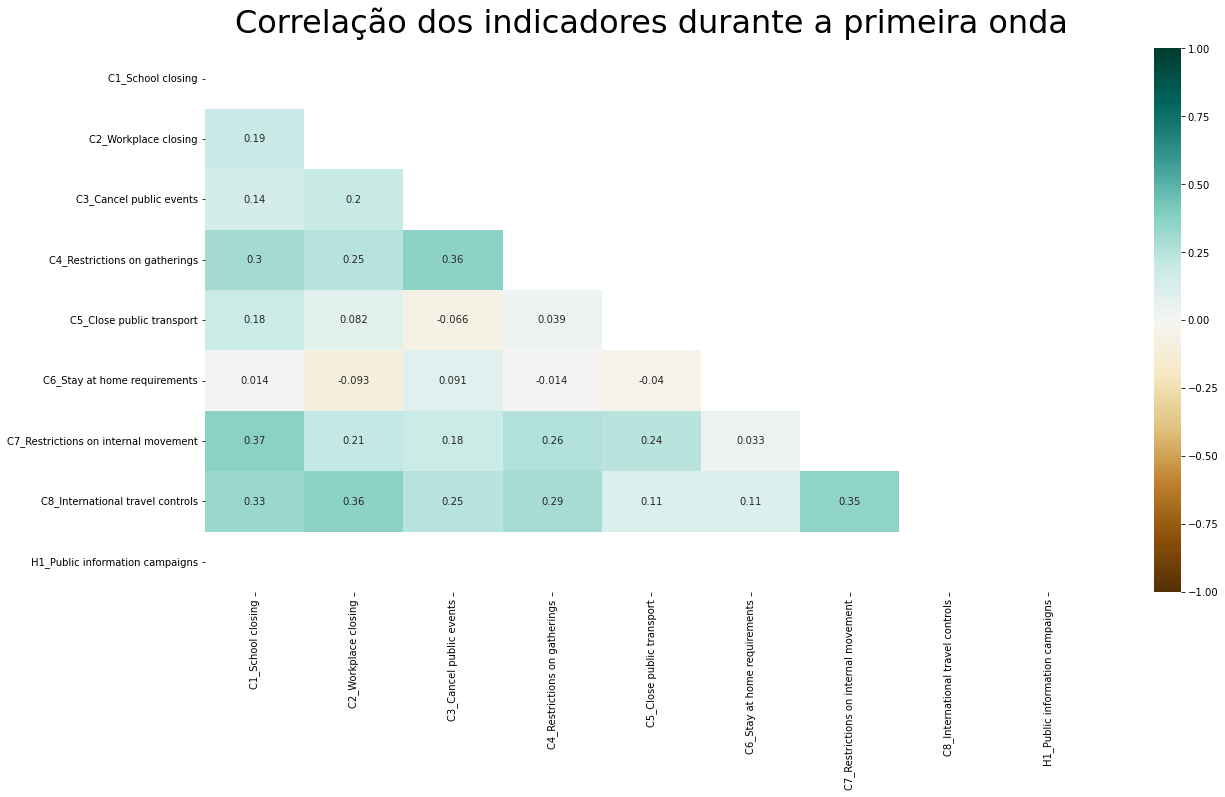

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_ind.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_ind.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação dos indicadores durante a primeira onda', fontdict={'fontsize':32}, pad=16);

In [8]:
#Campanha publica sempre é 2
#+ Q('H1_Public information campaigns')

# Modelo com os 9 Indicadores

In [9]:
df

,CityName,RegionCode,FormattedDate,RegionName,CityCode,Date,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,H1_Public information campaigns,ConfirmedDeaths,StringencyIndex,NewDeaths,idhm,idhmr,idhml,idhme,ConfirmedCases,NewCases,TotalHabitantes,Morte ponderada por 100 mil,MortePonderadaP100kMA,NewDeathsLag+35,ConfirmedDeathsLag+35,MortePonderadaP100kLag+35,MortePonderadaP100kMALag+35,NewDeathsLag+37,ConfirmedDeathsLag+37,MortePonderadaP100kLag+37,MortePonderadaP100kMALag+37,NewDeathsLag+5,ConfirmedDeathsLag+5,MortePonderadaP100kLag+5,MortePonderadaP100kMALag+5,NewDeathsLag+40,ConfirmedDeathsLag+40,MortePonderadaP100kLag+40,MortePonderadaP100kMALag+40,NewDeathsLag+10,ConfirmedDeathsLag+10,MortePonderadaP100kLag+10,MortePonderadaP100kMALag+10,NewDeathsLag+45,ConfirmedDeathsLag+45,MortePonderadaP100kLag+45,MortePonderadaP100kMALag+45,NewDeathsLag+15,ConfirmedDeathsLag+15,MortePonderadaP100kLag+15,MortePonderadaP100kMALag+15,NewDeathsLag+50,ConfirmedDeathsLag+50,MortePonderadaP100kLag+50,MortePonderadaP100kMALag+50,NewDeathsLag+20,ConfirmedDeathsLag+20,MortePonderadaP100kLag+20,MortePonderadaP100kMALag+20,NewDeathsLag+55,ConfirmedDeathsLag+55,MortePonderadaP100kLag+55,MortePonderadaP100kMALag+55,NewDeathsLag+120,ConfirmedDeathsLag+120,MortePonderadaP100kLag+120,MortePonderadaP100kMALag+120,NewDeathsLag+25,ConfirmedDeathsLag+25,MortePonderadaP100kLag+25,MortePonderadaP100kMALag+25,NewDeathsLag+90,ConfirmedDeathsLag+90,MortePonderadaP100kLag+90,MortePonderadaP100kMALag+90,NewDeathsLag+60,ConfirmedDeathsLag+60,MortePonderadaP100kLag+60,MortePonderadaP100kMALag+60,NewDeathsLag+30,ConfirmedDeathsLag+30,MortePonderadaP100kLag+30,MortePonderadaP100kMALag+30,NewCasesPonderado,MortePonderadaP100kMALag+45Log
30,Cruzeiro do Sul,BR_AC,2020-04-01,Acre,BR_1200203,20200401,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,NaN,83.33,NaN,0.664,0.648,0.776,0.582,NaN,NaN,89072,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.080193,NaN,NaN,0.000000,0.000000e+00,0.0,0.0,0.000000,0.080193,NaN,NaN,0.000000,0.000000,0.0,1.0,0.000000,0.080193,0.0,0.0,0.000000,0.000000,NaN,3.0,0.000000,0.160385,0.0,0.0,0.000000,0.000000,1.0,4.0,1.122698,0.641542,1.0,52.0,1.122698,0.561349,0.0,0.0,0.000000,0.000000,0.0,35.0,0.000000,0.721735,2.0,9.0,2.245397,0.641542,0.0,0.0,0.000000,0.000000,NaN,-2.523322
1014,Manaus,BR_AM,2020-04-01,Amazonas,BR_1302603,20200401,3.0,2.0,2.0,2.0,0.0,1.0,2.0,4.0,2.0,2.0,72.22,0.0,0.737,0.738,0.826,0.658,179.0,20.0,2219580,0.000000,6.114474e-02,73.0,532.0,3.288943,1.454601,41.0,604.0,1.847215,1.599418,4.0,15.0,0.180216,1.641254e-01,11.0,691.0,0.495594,1.779634,3.0,45.0,0.135162,0.392614,32.0,920.0,1.441729,1.683089,15.0,107.0,0.675810,0.473067,37.0,1094.0,1.666999,1.657344,7.0,163.0,0.315378,0.630756,58.0,1248.0,2.613133,1.351621,2.0,2003.0,0.090108,0.199525,13.0,246.0,0.585702,0.753046,19.0,1790.0,0.856026,0.411922,0.0,1366.0,0.000000,0.920389,45.0,357.0,2.027431,1.190713,0.901071,0.520631
6426,Belem,BR_PA,2020-04-01,Para,BR_1501402,20200401,3.0,2.0,2.0,4.0,1.0,1.0,2.0,4.0,2.0,0.0,83.33,0.0,0.746,0.751,0.822,0.673,25.0,4.0,1499641,0.000000,1.428928e-02,16.0,216.0,1.066933,1.986210,30.0,297.0,2.000499,2.143392,3.0,3.0,0.200050,5.239402e-02,80.0,427.0,5.334663,2.286284,1.0,8.0,0.066683,0.104788,29.0,652.0,1.933815,2.395835,4.0,20.0,0.266733,0.104788,53.0,965.0,3.534215,2.105287,1.0,24.0,0.066683,0.266733,19.0,1174.0,1.266983,2.014788,4.0,2026.0,0.266733,0.009526,8.0,67.0,0.533466,0.743042,8.0,1905.0,0.533466,0.466783,0.0,1320.0,0.000000,2.586359,17.0,156.0,1.133616,1.114564,0.266731,0.873732
11100,Porto Alegre,BR_RS,2020-04-01,Rio Grande do Sul,BR_4314902,20200401,3.0,3.0,2.0,4.0,1.0,2.0,2.0,4.0,2.0,3.0,90.74,1.0,0.805,0.867,0.857,0.702,190.0,0.0,1488252,0.067194,2.399771e-02,0.0,17.0,0.000000,0.023998,0.0,17.0,0.000000,0.028797,0.0,5.0,0.000000,1.919817e-02,1.0,18.0,0.06

In [10]:
mod = smf.ols(formula="Q('MortePonderadaP100kMALag+45Log') ~ Q('C1_School closing') + Q('C2_Workplace closing') + Q('C3_Cancel public events') + \
     Q('C4_Restrictions on gatherings') + Q('C5_Close public transport')\
     + Q('C6_Stay at home requirements') + Q('C7_Restrictions on internal movement') + Q('C8_International travel controls') + Q('H1_Public information campaigns')", data=df)
res = mod.fit()
# res.summary() #R-squared:	0.060

## 9 Indicadores + NovosCasosPonderado(Controle)

In [11]:
mod = smf.ols(formula="Q('MortePonderadaP100kMALag+45Log') ~ Q('NewCasesPonderado')\
    + Q('C1_School closing') + Q('C2_Workplace closing') + Q('C3_Cancel public events') + \
    + Q('C4_Restrictions on gatherings') + Q('C5_Close public transport')\
     + Q('C6_Stay at home requirements') + Q('C7_Restrictions on internal movement') + Q('C8_International travel controls') + Q('H1_Public information campaigns')", data=df)
res_casos = mod.fit()
# res_casos.summary() #R-squared:	0.058
# O coef do newcasesponderado se mantém o msm q o modelo com as cidades(categories), e o pvalue muda 0.001

## 9 Indicadores + Cidades(categories)

In [12]:
mod = smf.ols(formula="Q('MortePonderadaP100kMALag+45Log') ~ C(CityName) + Q('C1_School closing') + Q('C2_Workplace closing') + Q('C3_Cancel public events') + \
    + Q('C4_Restrictions on gatherings') + Q('C5_Close public transport')\
     + Q('C6_Stay at home requirements') + Q('C7_Restrictions on internal movement') + Q('C8_International travel controls') + Q('H1_Public information campaigns')", data=df)
res_cdds = mod.fit()
# res_cdds.summary() #R-squared:	0.108

## 9 Indicadores + Cidades(categories) + NovosCasosPonderado(Controle)

In [13]:
mod = smf.ols(formula="Q('MortePonderadaP100kMALag+45Log') ~ C(CityName) + Q('NewCasesPonderado')\
    + Q('C1_School closing') + Q('C2_Workplace closing') + Q('C3_Cancel public events') + \
    + Q('C4_Restrictions on gatherings') + Q('C5_Close public transport')\
     + Q('C6_Stay at home requirements') + Q('C7_Restrictions on internal movement') + Q('C8_International travel controls') + Q('H1_Public information campaigns')", data=df)
res_cdds_casos = mod.fit()
# res_cdds_casos.summary() # R-squared:	0.104

## 9 Indicadores + Cidades(categories) + NovosCasosPonderado(Controle) + IDHM

In [14]:
mod = smf.ols(formula="Q('MortePonderadaP100kMALag+45') ~ C(CityName) + Q('NewCasesPonderado')\
    + Q('C1_School closing') + Q('C2_Workplace closing') + Q('C3_Cancel public events') + \
    + Q('C4_Restrictions on gatherings') + Q('C5_Close public transport')\
    + Q('C6_Stay at home requirements') + Q('C7_Restrictions on internal movement') + Q('C8_International travel controls') + Q('H1_Public information campaigns')\
    + Q('idhm')", data=df)
res_cdds_casos_idhm = mod.fit()
res_cdds_casos_idhm.summary() #R-squared:	0.104 com apenas o idhm

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     Q('MortePonderadaP100kMALag+45')   R-squared:                       0.298
Model:                                          OLS   Adj. R-squared:                  0.294
Method:                               Least Squares   F-statistic:                     74.54
Date:                              Thu, 30 Jun 2022   Prob (F-statistic):               0.00
Time:                                      19:32:33   Log-Likelihood:                -3652.6
No. Observations:                             10767   AIC:                             7429.
Df Residuals:                                 10705   BIC:                             7881.
Df Model:                                        61                                         
Covariance Type:                          nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.1053      0.012     -9.138      0.000      -0.128      -0.083
C(CityName)[T.Aparecida de Goiania]           0.2749      0.034      7.981      0.000       0.207       0.342
C(CityName)[T.Aracaju]                        0.3088      0.033      9.261      0.000       0.243       0.374
C(CityName)[T.Araguaina]                      0.3624      0.033     11.031      0.000       0.298       0.427
C(CityName)[T.Arapiraca]                      0.1245      0.036      3.495      0.000       0.055       0.194
C(CityName)[T.Belem]                          0.3591      0.033     10.726      0.000       0.293       0.425
C(CityName)[T.Belo Horizonte]                -0.0044      0.033     -0.135      0.892      -0.069       0.060
C(CityName)[T.Boa Vista]                      0.3183      0.034      9.262      0.000       0.251       0.386
C(CityName)[T.Brasilia]                    1.461e-15    1.5e-16      9.744      0.000    1.17e-15    1.75e-15
C(CityName)[T.Campina Grande]                 0.3309      0.036      9.218      0.000       0.261       0.401
C(CityName)[T.Campo Grande]                   0.3227      0.037      8.753      0.000       0.250       0.395
C(CityName)[T.Caucaia]                        0.2294      0.034      6.747      0.000       0.163       0.296
C(CityName)[T.Caxias do Sul]                  0.0837      0.033      2.526      0.012       0.019       0.149
C(CityName)[T.Cruzeiro do Sul]                0.0413      0.037      1.126      0.260      -0.031       0.113
C(CityName)[T.Cuiaba]                         0.4778      0.038     12.463      0.000       0.403       0.553
C(CityName)[T.Curitiba]                       0.1409      0.032      4.469      0.000       0.079       0.203
C(CityName)[T.Dourados]                       0.2137      0.035      6.168      0.000       0.146       0.282
C(CityName)[T.Feira de Santana]               0.0075      0.034      0.219      0.827      -0.059       0.074
C(CityName)[T.Florianopolis]                 -0.0885      0.032     -2.770      0.006      -0.151      -0.026
C(CityName)[T.Fortaleza]                      0.3651      0.033     10.971      0.000       0.300       0.430
C(CityName)[T.Goiania]                        0.3977      0.033     12.191      0.000       0.334       0.462
C(CityName)[T.Guarulhos]                      0.3428      0.034     10.182      0.000       0.277       0.409
C(CityName)[T.Imperatriz]                     0.5582      0.035     15.988      0.000       0.490       0.627
C(CityName)[T.Jaboatao dos Guararapes]        0.3574      0.036     1

## Stargazer dos modelos com indicadores

In [15]:
stargazer = Stargazer([res, res_casos, res_cdds, res_cdds_casos, res_cdds_casos_idhm])
stargazer

In [16]:
pred_val = res_cdds_casos_idhm.fittedvalues.copy()
true_val = df.loc[:, ['MortePonderadaP100kMALag+45', 'CityName', 'RegionName', 'FormattedDate']].copy()


In [17]:
true_val

,MortePonderadaP100kMALag+45,CityName,RegionName,FormattedDate
30,0.080193,Cruzeiro do Sul,Acre,2020-04-01
1014,1.683089,Manaus,Amazonas,2020-04-01
6426,2.395835,Belem,Para,2020-04-01
11100,0.043196,Porto Alegre,Rio Grande do Sul,2020-04-01
6672,0.163144,Santarem,Para,2020-04-01
...,...,...,...,...
7625,0.242521,Jaboatao dos Guararapes,Pernambuco,2020-11-02
7379,0.297072,Joao Pessoa,Paraiba,2020-11-02
7133,0.138763,Campina Grande,Paraiba,2020-11-02
6395,0.120039,Ananindeua,Para,2020-11-02


In [18]:
df_residual = pd.merge(pred_val.to_frame(), true_val, left_index=True, right_index=True)
df_residual = df_residual.rename(columns={df_residual.columns[0]:'predict_values', 'MortePonderadaP100kMALag+45':'real_values'})

df_residual['residuals'] = df_residual['real_values'] - df_residual['predict_values']


In [19]:
df_residual.sort_values(by='FormattedDate')

,predict_values,real_values,CityName,RegionName,FormattedDate,residuals
1014,0.578764,1.683089,Manaus,Amazonas,2020-04-01,1.104325
2244,0.582817,0.343946,Salvador,Bahia,2020-04-01,-0.238871
1998,0.383915,0.023056,Feira de Santana,Bahia,2020-04-01,-0.360858
2490,0.616130,0.567191,Caucaia,Ceara,2020-04-01,-0.048939
2736,0.775275,2.092407,Fortaleza,Ceara,2020-04-01,1.317132
...,...,...,...,...,...,...
983,0.245073,0.160224,Maceio,Alagoas,2020-11-02,-0.084849
737,0.039235,0.153251,Arapiraca,Alagoas,2020-11-02,0.114016
491,0.323171,0.466499,Rio Branco,Acre,2020-11-02,0.143328
2951,0.431151,0.271189,Fortaleza,Ceara,2020-11-02,-0.159963


In [20]:
df_residual['residuals2'] = res_cdds_casos_idhm.resid


In [21]:
df_residual['real_values'].to_frame().reset_index()

,index,real_values
0,1014,1.683089
1,6426,2.395835
2,11100,0.043196
3,6918,0.138763
4,7164,0.323284
...,...,...
10762,8117,0.046539
10763,7871,0.341279
10764,7625,0.242521
10765,6395,0.120039


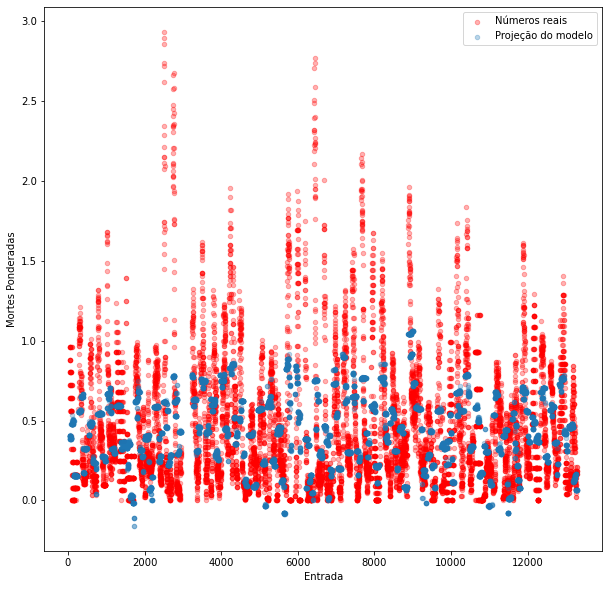

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
df_residual['real_values'].to_frame().reset_index().plot(ax=ax, kind='scatter', x='index', y='real_values', alpha=0.3, color='red')
df_residual['predict_values'].to_frame().reset_index().plot(ax=ax, kind='scatter', x='index', y='predict_values', alpha=0.3,)
# df_residual['residuals'].to_frame().reset_index().plot(kind='scatter', x='index', y='residuals', ax=ax, alpha=1, color='black')
# df_residual['residuals2'].to_frame().reset_index().plot(kind='scatter', x='index', y='residuals2', ax=ax, alpha=0.05, color='green')

ax.axes.set_ylabel('Mortes Ponderadas')
ax.axes.set_xlabel('Entrada')
ax.legend(labels=['Números reais', 'Projeção do modelo'])

Text(0.5, 0, 'Valor Projetado')

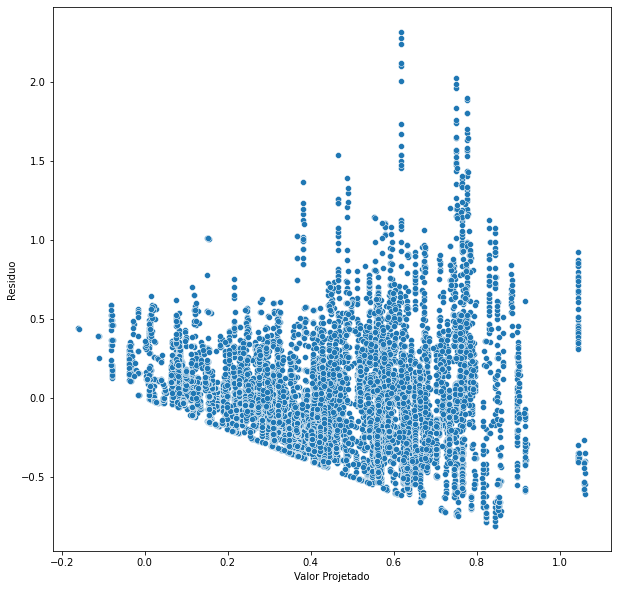

In [23]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

sns.scatterplot(data=df_residual, y='residuals2', x='predict_values', ax=ax)

ax.axes.set_ylabel('Residuo')
ax.axes.set_xlabel('Valor Projetado')

In [24]:
city = df_residual['CityName'].sort_values().unique()
city


array(['Ananindeua', 'Aparecida de Goiania', 'Aracaju', 'Araguaina',
       'Arapiraca', 'Belem', 'Belo Horizonte', 'Boa Vista',
       'Campina Grande', 'Campo Grande', 'Caucaia', 'Caxias do Sul',
       'Cruzeiro do Sul', 'Cuiaba', 'Curitiba', 'Dourados',
       'Feira de Santana', 'Florianopolis', 'Fortaleza', 'Goiania',
       'Guarulhos', 'Imperatriz', 'Jaboatao dos Guararapes', 'Ji-Parana',
       'Joao Pessoa', 'Joinville', 'Lagarto', 'Laranjal do Jari',
       'Londrina', 'Macapa', 'Maceio', 'Manaus', 'Mossoro', 'Natal',
       'Palmas', 'Parintins', 'Parnaiba', 'Porto Alegre', 'Porto Velho',
       'Recife', 'Rio Branco', 'Rio de Janeiro', 'Rondonopolis',
       'Rorainopolis', 'Salvador', 'Santarem', 'Sao Goncalo', 'Sao Luis',
       'Sao Paulo', 'Teresina', 'Uberlandia', 'Vila Velha', 'Vitoria'],
      dtype=object)

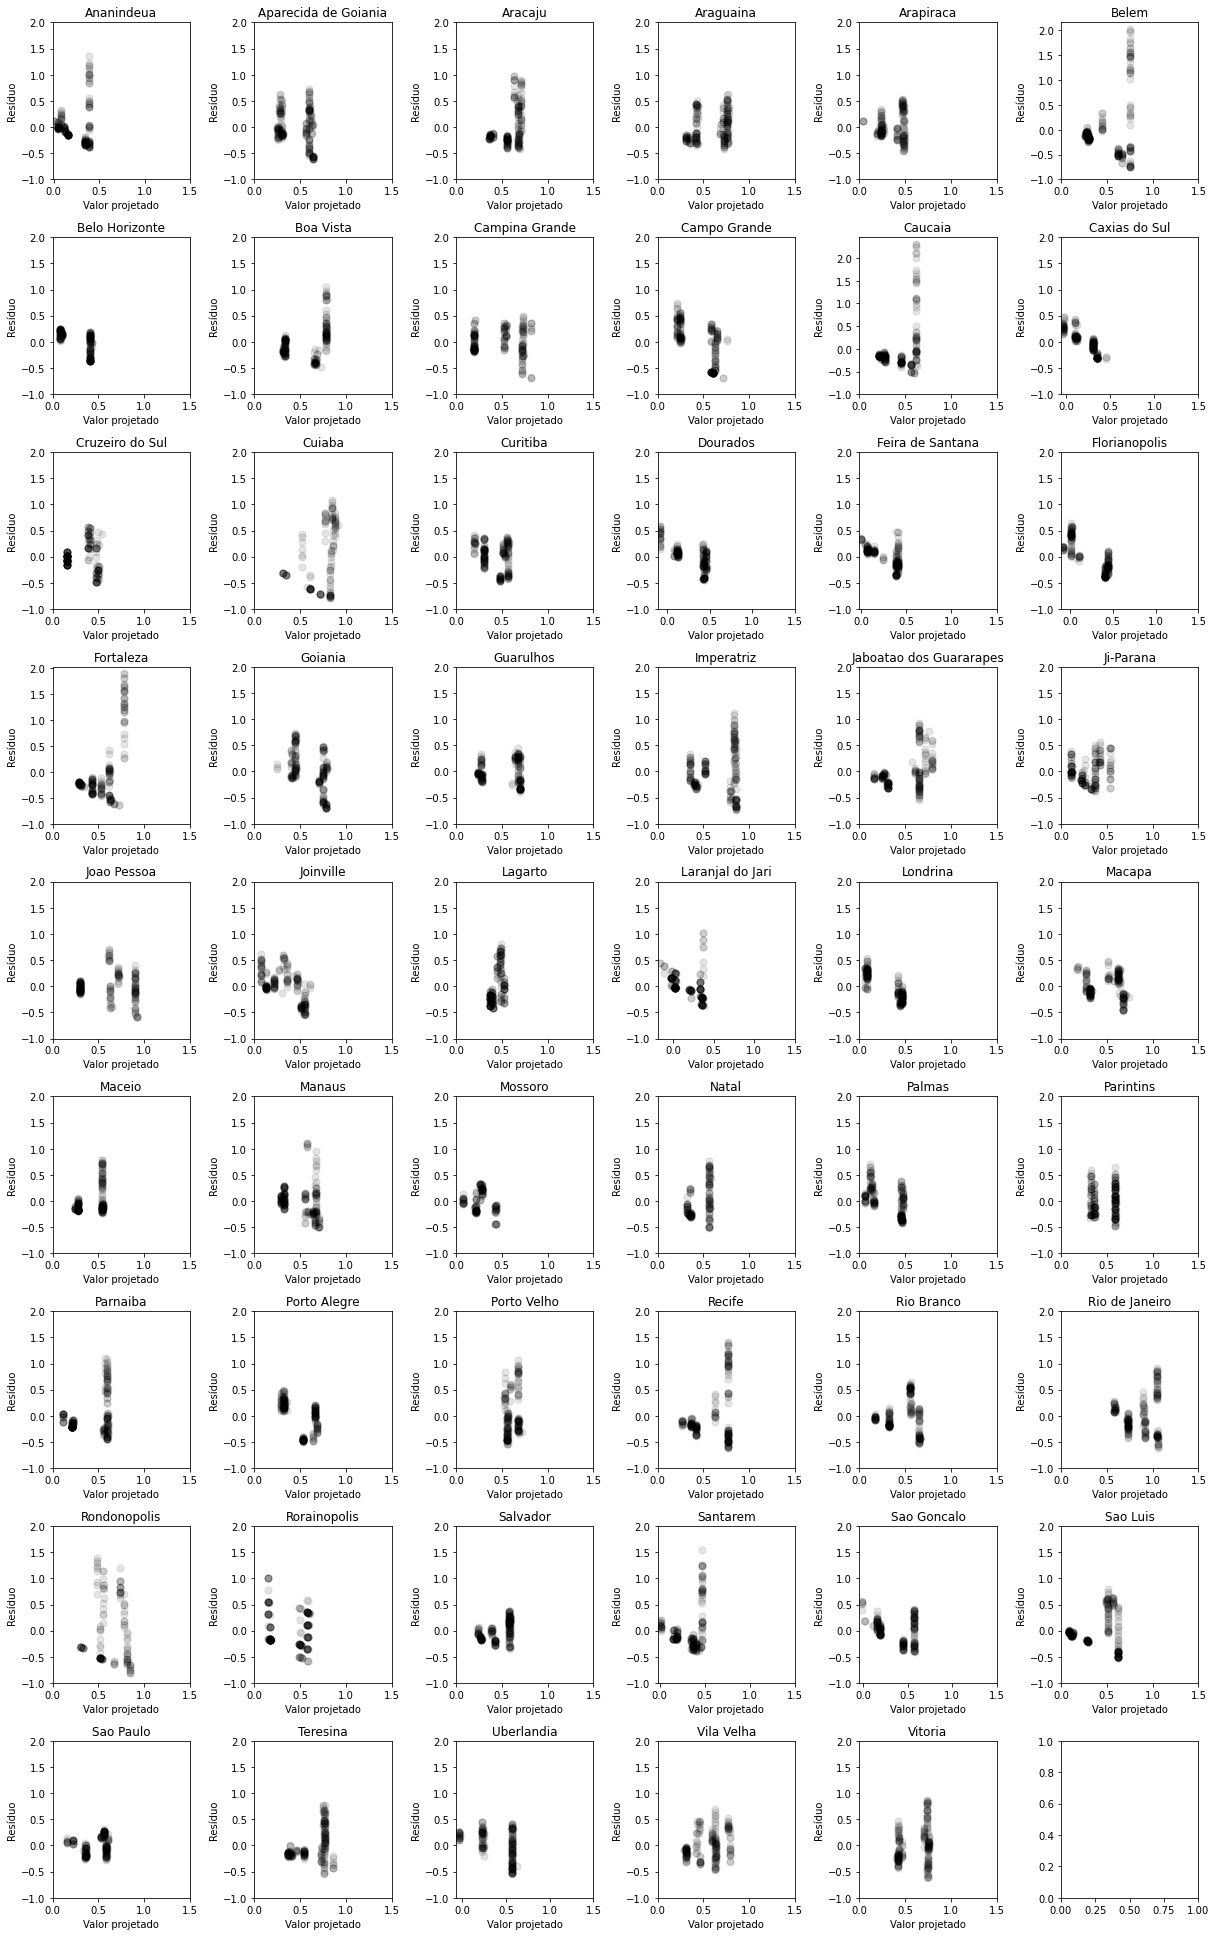

In [25]:
fig, axs = plt.subplots(9, 6, figsize=(17,27))

c = 0

for i in range(9):
    for j in range(6):
        if c >= 53:
            break

        c_name = city[c]
        c += 1
        aux = df_residual.loc[df_residual['CityName'] == c_name, :]

        axs[i,j].scatter(y=aux['residuals2'].to_list(), x=aux['predict_values'].to_list(), s=50, alpha=0.1, color='black')
        # axs[i,j].scatter(x=aux.index.to_list(), y=aux['residuals2'].to_list(), s=50, alpha=0.7, color='red')

        axs[i, j].set_title(c_name)
        axs[i, j].axes.set_ylabel('Resíduo')
        axs[i, j].axes.set_xlabel('Valor projetado')
        axs[i, j].axes.set_yticks(np.arange(-1,2.5,0.5))
        axs[i, j].axes.set_xticks(np.arange(0,2,0.5))

plt.tight_layout()
plt.show()

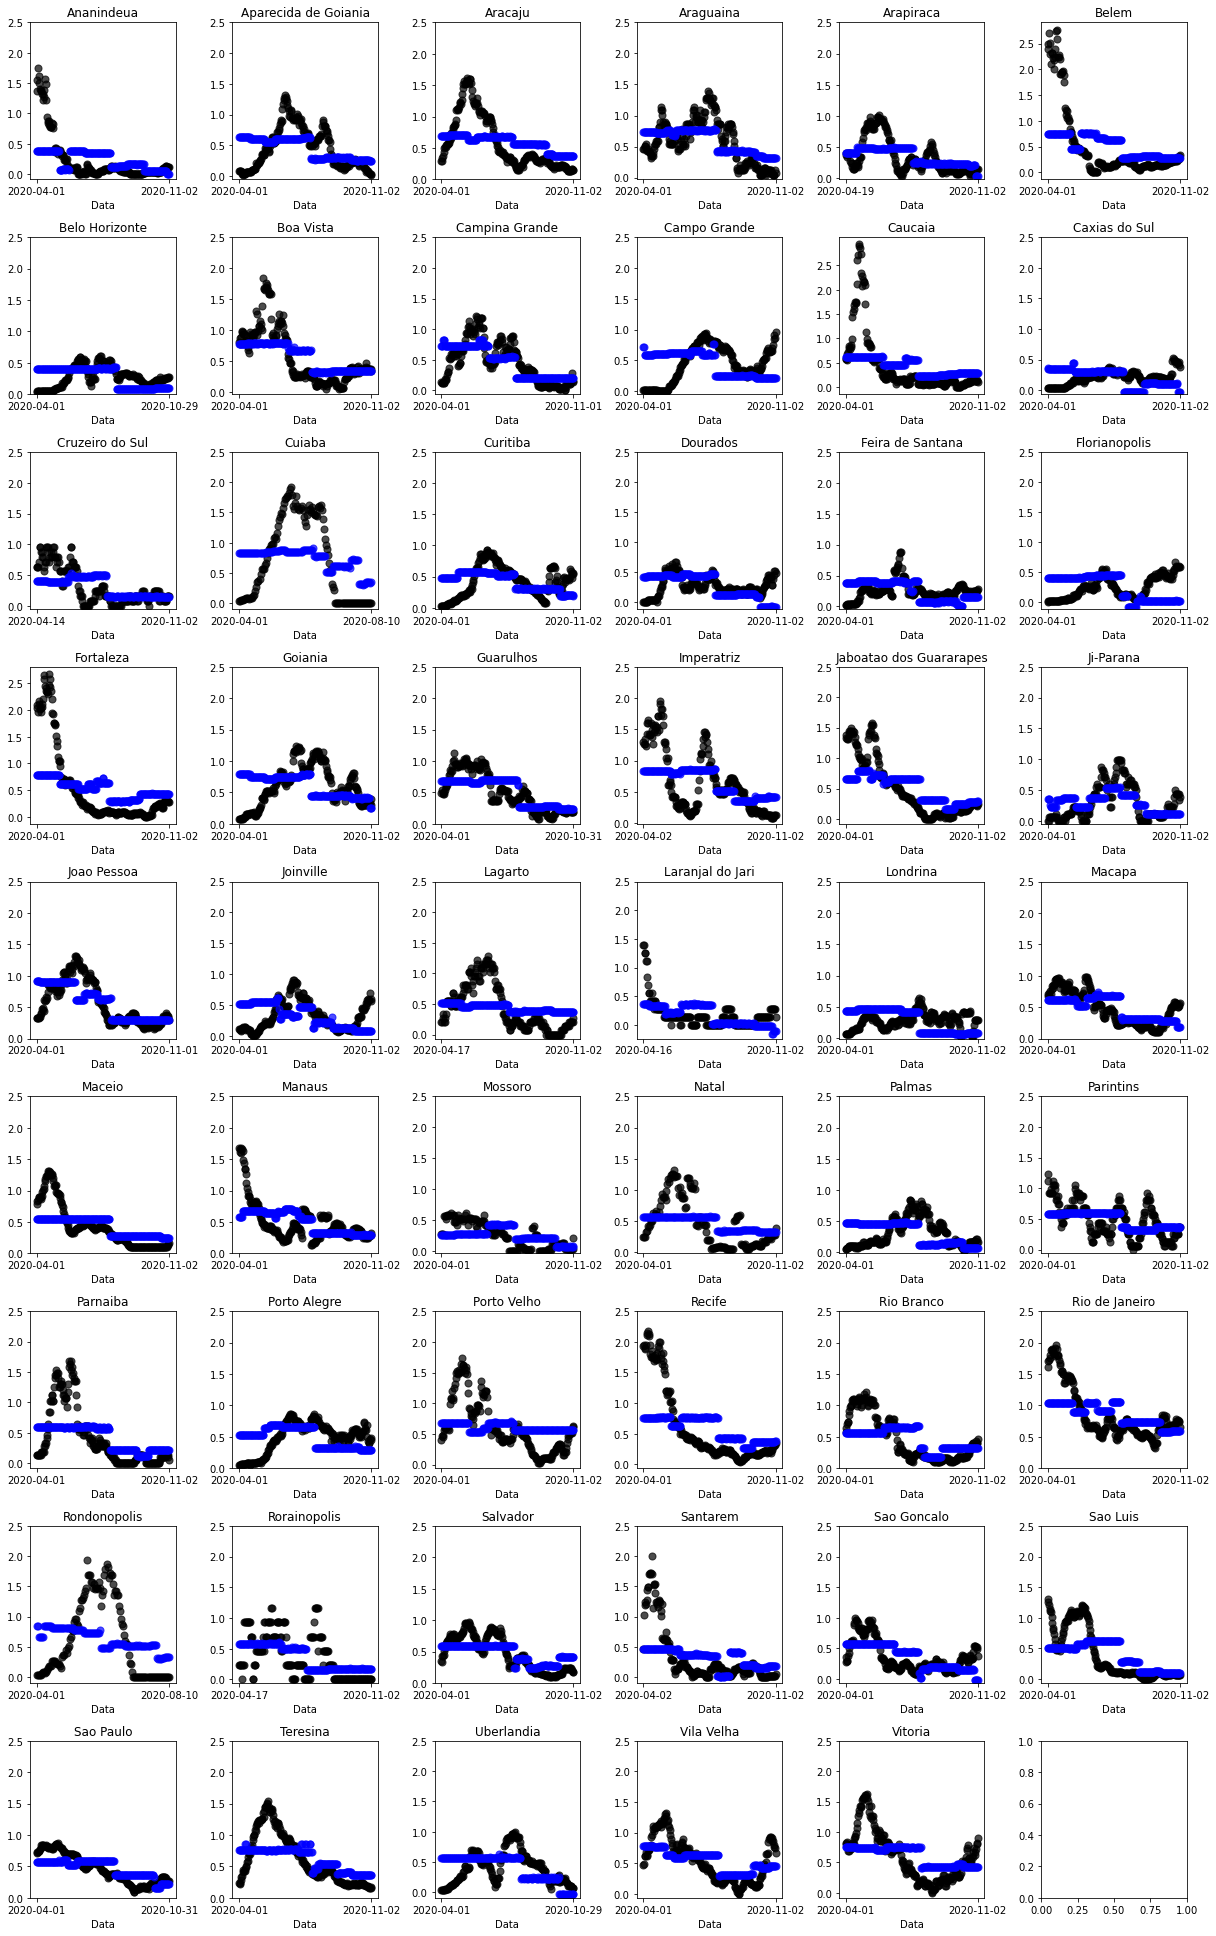

In [26]:
fig, axs = plt.subplots(9, 6, figsize=(17,27))

c = 0

for i in range(9):
    for j in range(6):
        if c >= 53:
            c=0
            break

        c_name = city[c]
        c += 1
        aux = df_residual.loc[df_residual['CityName'] == c_name, :]

        axs[i,j].scatter(x=aux['FormattedDate'].to_list(), y=aux['real_values'].to_list(), s=50, alpha=0.7, color='black')
        axs[i,j].scatter(x=aux['FormattedDate'].to_list(), y=aux['predict_values'].to_list(), s=50, alpha=0.7, color='blue')
        # axs[i,j].scatter(x=aux.index.to_list(), y=aux['residuals2'].to_list(), s=50, alpha=0.7, color='red')

        axs[i, j].set_title(c_name)
        # axs[i, j].axes.set_ylabel('Morte Ponderada')
        axs[i, j].axes.set_xlabel('Data')
        axs[i, j].axes.set_xticks([
            aux['FormattedDate'].to_list()[0],
            aux['FormattedDate'].to_list()[-1]
        ])
        axs[i, j].axes.set_yticks(np.arange(0,3,0.5))

plt.tight_layout()
plt.show()

In [27]:
city=[
    'Porto Alegre',
    'Sao Luis'
]

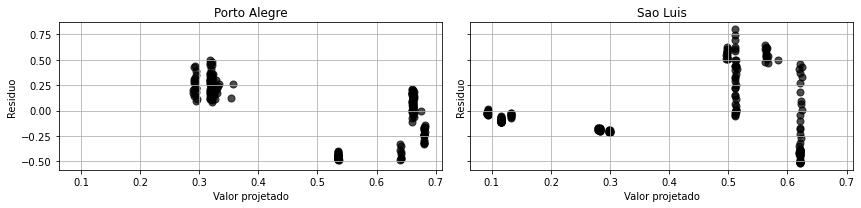

In [28]:
fig, axs = plt.subplots(1, 2, figsize=(12,3), sharex=True, sharey=True)
c=0
 
for j in range(2):
    c_name = city[c]
    c += 1
    aux = df_residual.loc[df_residual['CityName'] == c_name, :]


    axs[j].grid(True)

    axs[j].scatter(y=aux['residuals2'].to_list(), x=aux['predict_values'].to_list(), s=50, alpha=0.7, color='black')
    
    axs[j].set_title(c_name)
    axs[j].axes.set_ylabel('Residuo')
    axs[j].axes.set_xlabel('Valor projetado')

plt.tight_layout()
plt.show()

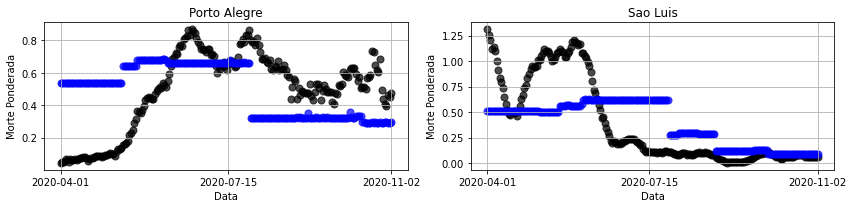

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(12,3))
c=0

for j in range(2):
    c_name = city[c]
    c += 1
    aux = df_residual.loc[df_residual['CityName'] == c_name, :]

    axs[j].grid(True)

    axs[j].scatter(x=aux['FormattedDate'].to_list(), y=aux['real_values'].to_list(), s=50, alpha=0.7, color='black')
    axs[j].scatter(x=aux['FormattedDate'].to_list(), y=aux['predict_values'].to_list(), s=50, alpha=0.7, color='blue')
    # axs[i,j].scatter(x=aux.index.to_list(), y=aux['residuals2'].to_list(), s=50, alpha=0.7, color='red')

    axs[j].set_title(c_name)
    
    axs[j].axes.set_ylabel('Morte Ponderada')
    axs[j].axes.set_xlabel('Data')
    axs[j].axes.set_xticks([
        aux['FormattedDate'].to_list()[0],
        '2020-07-15',
        aux['FormattedDate'].to_list()[-1]
    ])
    

plt.tight_layout()
plt.show()